In [36]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

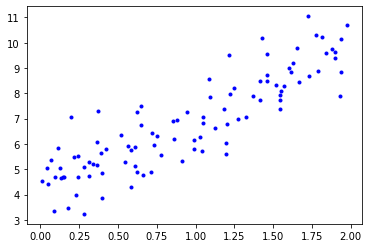

In [37]:

plt.plot(X, y,"b.") 
plt.show()

In [38]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
print(theta_best)


[[4.21509616]
 [2.77011339]]


In [39]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.21509616]
 [9.75532293]]


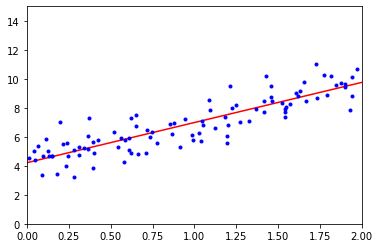

In [40]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [41]:

from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_) 
lin_reg.predict(X_new)

[4.21509616] [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

In [42]:
eta = 0.1 # learning rate 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [43]:
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
  theta = theta - eta * gradients
print(theta)

[[4.21509616]
 [2.77011339]]


In [44]:
def plot_gradient_descent(theta, alpha): 
  m = len(X_b)
  plt.plot(X, y, "b.") #scatter plot n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10: #plot the lines for the first 10 iterations
      y_predict = X_new_b.dot(theta) 
      style = "b-" if iteration > 0 else "r--" 
      plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients 
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

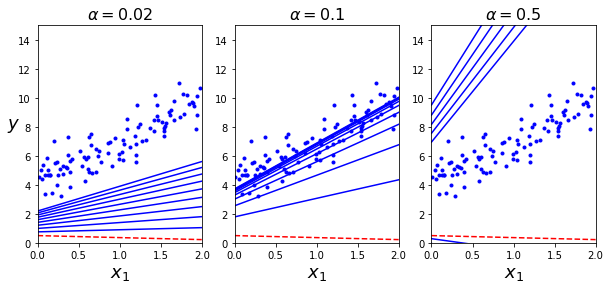

In [45]:

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, alpha=0.02) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta,alpha=0.1) 
plt.subplot(133); plot_gradient_descent(theta,alpha=0.5)
plt.show()

In [46]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1] 
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
    eta = learning_schedule(epoch * m + i) 
    theta = theta - eta * gradients
print(theta)

[[4.20742938]
 [2.74264448]]


In [47]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.21077682] [2.76927873]
